In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


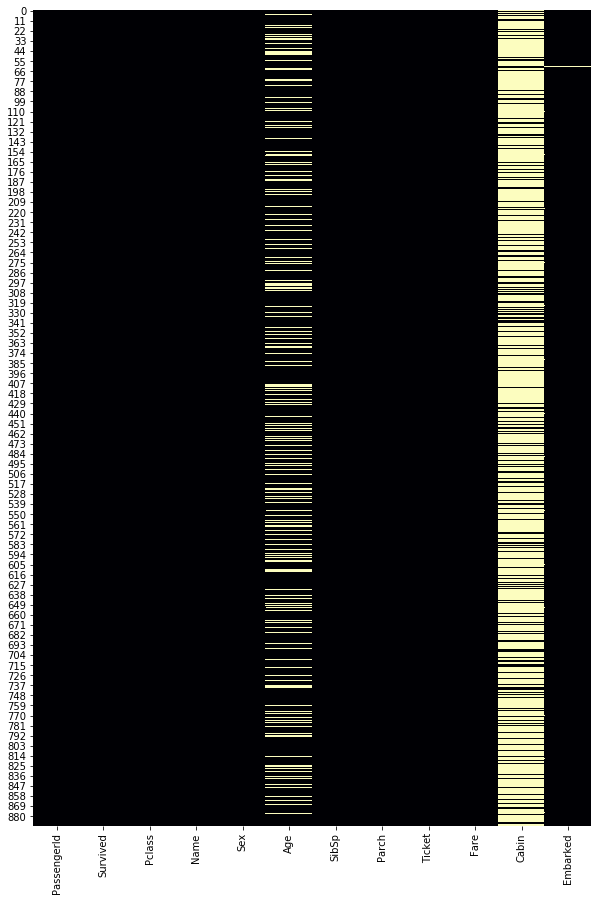

In [3]:
fig,ax = plt.subplots()
fig.set_size_inches(10,15)
sns.heatmap(data.isnull(),cbar=False,cmap='magma')

Looks like we're missing two data point from Embarked some data from Age and a lot from Cabin

Solution:
1. Drop the two in Embarked
2. Drop cabin
3. Try to use linear regression to predict the age for the null ones


In [4]:
data = data[~data.Embarked.isnull()]
data.drop('Cabin',axis=1,inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


I'm gonna make dummy variables for Pclass which is the fare class and Sex. Embarked will get the same treatment as well as it identifies the port at which the passenger embarked. I'll drop the first row of dummy variables because it can be inferred from the others

In [5]:
pclass = pd.get_dummies(data.Pclass,drop_first=True)
sex = pd.get_dummies(data.Sex,drop_first=True)
embarked = pd.get_dummies(data.Embarked,drop_first=True)
data = pd.concat([data,pclass,sex,embarked],axis=1)
del pclass
del sex
del embarked
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,2,3,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,1,0,1


Sex, Pclass and Embarked are now redundant so I'll drop them. I'm also gonna drop Name and Ticket as they need further feature engineering to be useful. PasengerId gives no useful information so that'll be dropped as well

In [6]:
data.drop(['Sex','Pclass','Embarked','Name','Ticket','PassengerId'],axis=1,inplace=True)
data.head()

,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


Now I'll split the data with non-null age values into a train and test set and try to learn the relationship between age and everything but Survived

In [7]:
survived = data.Survived
data.drop('Survived',inplace=True,axis=1)
data_good = data[~data.Age.isnull()]
data_good.head()

,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,22.0,1,0,7.2500,0,1,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,1,0,0,1
3,35.0,1,0,53.1000,0,0,0,0,1
4,35.0,0,0,8.0500,0,1,1,0,1


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from regressors import stats
X_train, X_test, y_train, y_test = train_test_split(data_good.drop('Age',axis=1), data_good.Age, test_size=0.2, random_state=101)
X_train

,SibSp,Parch,Fare,2,3,male,Q,S
66,0,0,10.5000,1,0,0,0,1
813,4,2,31.2750,0,1,0,0,1
830,1,0,14.4542,0,1,0,0,0
741,1,0,78.8500,0,0,1,0,1
581,1,1,110.8833,0,0,0,0,0
138,0,0,9.2167,0,1,1,0,1
580,1,1,30.0000,1,0,0,0,1
831,1,1,18.7500,1,0,1,0,1
333,2,0,18.0000,0,1,1,0,1
346,0,0,13.0000,1,0,0,0,1


In [9]:
lm = LinearRegression()
lm.fit(X_train,y_train)
coeff_df = pd.DataFrame(lm.coef_,data_good.drop('Age',axis=1).columns,columns=['Coefficient'])
coeff_df

,Coefficient
SibSp,-3.955433
Parch,-1.242303
Fare,-0.015799
2,-10.266597
3,-15.140883
male,2.568726
Q,5.478037
S,3.004678


In [10]:
from sklearn import metrics
predictions = lm.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 9.826888993417393
MSE: 152.42313683007296
RMSE: 12.345976544205524


So the linear regression has a MAE of 9.8 years. I'm gonna fill the empty age values with the predictions from the linear regression model

In [11]:
data_notgood = data[data.Age.isnull()]
data_notgood.head()

,Age,SibSp,Parch,Fare,2,3,male,Q,S
5,NaN,0,0,8.4583,0,1,1,1,0
17,NaN,0,0,13.0000,1,0,1,0,1
19,NaN,0,0,7.2250,0,1,0,0,0
26,NaN,0,0,7.2250,0,1,1,0,0
28,NaN,0,0,7.8792,0,1,0,1,0


In [12]:
lm.predict(data_notgood.drop('Age',axis=1))

array([31.54166457, 33.87083467, 23.51438663, 26.08311269, 28.98208798,
       29.07719228, 32.4990407 , 28.98412927, 26.08304633, 26.07251442,
       29.074756  , 27.47497666, 28.98412927, 17.94387843, 43.78194455,
       40.90017373, 20.7586524 , 29.07719228, 29.074756  , 28.98353679,
       29.074756  , 29.074756  , 29.07719228, 29.07910085, 24.76958541,
       29.074756  , 31.55285532, 18.07755279, 20.90305616, 29.08640809,
       29.06507884, -6.02497982, 39.66282619, 43.93322424, 15.69097979,
       -8.59370587, 30.83376795, 43.55285261, 24.90625061, 31.55285532,
       28.98412927, -6.02497982, 27.59742236, 29.07719228, 13.12225373,
       26.51392967, 19.44473633, 24.90625061, 29.08739556, 37.51810491,
       31.55285532, 28.98412927, 43.85304206, 28.98412927, 34.07622745,
       43.93203928, 40.90017373, 43.86094178, 28.98412927, 23.39709801,
       33.78573774, 29.074756  , 37.01752637, -6.02497982, 20.82837195,
       35.70707005, 29.07719228, 22.42341146, 43.78984428, 26.08

It appears that the model is predicting negative values which are obviously wrong. This happens because the model does not respect the 0 bound. To address this, I'm gonna retrain the model using the natural log of the age and predict that.

In [13]:
lm = LinearRegression()
lm.fit(X_train,np.log(y_train))
coeff_df = pd.DataFrame(lm.coef_,data_good.drop('Age',axis=1).columns,columns=['Coefficient'])
coeff_df

,Coefficient
SibSp,-0.259534
Parch,-0.183549
Fare,0.000161
2,-0.418682
3,-0.530841
male,0.045102
Q,0.210669
S,0.182516


In [14]:
from sklearn import metrics
predictions = np.exp(lm.predict(X_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 9.932598129228252
MSE: 175.5880763681381
RMSE: 13.250965110818838


In [15]:
data_notgood['Age'] = np.exp(lm.predict(data_notgood.drop('Age',axis=1)))

C:\Users\amira\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
data.head()

,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,22.0,1,0,7.2500,0,1,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,1,0,0,1
3,35.0,1,0,53.1000,0,0,0,0,1
4,35.0,0,0,8.0500,0,1,1,0,1


In [17]:
data = pd.concat([data_good,data_notgood],axis=0)
data.sort_index(inplace=True)
data.head()

,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,22.0,1,0,7.2500,0,1,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,1,0,0,1
3,35.0,1,0,53.1000,0,0,0,0,1
4,35.0,0,0,8.0500,0,1,1,0,1


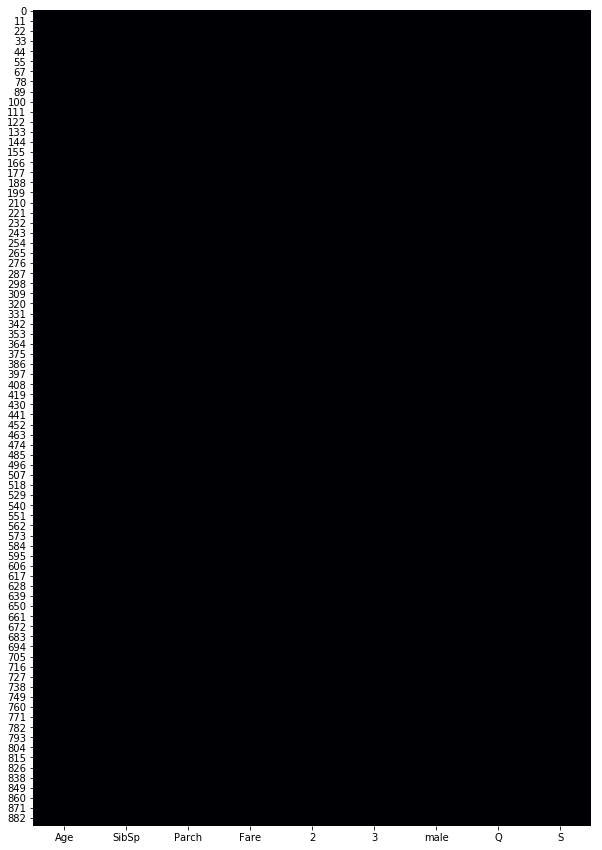

In [18]:
fig,ax = plt.subplots()
fig.set_size_inches(10,15)
sns.heatmap(data.isnull(),cbar=False,cmap='magma')

Now all null values have either been dropped or replaced by an "educated" guess, we can continue with training the logistic regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lrm = LogisticRegression(solver='lbfgs',max_iter=1000)
X_train, X_test, y_train, y_test = train_test_split(data, survived, test_size=0.2, random_state=101)
lrm.fit(X_train,y_train)
lrm.score(X_test,y_test)
predictions = lrm.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       107
           1       0.84      0.68      0.75        71

   micro avg       0.82      0.82      0.82       178
   macro avg       0.83      0.80      0.80       178
weighted avg       0.82      0.82      0.82       178



Now we have a baseline in place, lets try to predict from the test dataset. For this, the same preprocessing steps will need to be applied to the test set. Lets examine this dataset as well

In [33]:
data_test = pd.read_csv('test.csv')
passenger_id = data_test.PassengerId
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


It seems there is one missing value for the Fare. Lets see if we can quickly fill that in by analyzing the fare's relationship to the Pclass

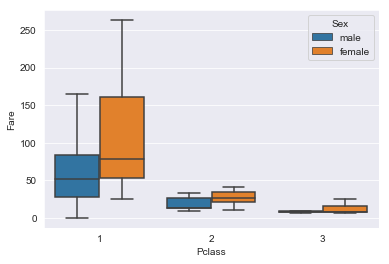

In [34]:
sns.set_style('darkgrid')
sns.boxplot(x="Pclass",y="Fare",data=data_test,hue='Sex',showfliers=False)

So it seems the sex and cabin class can be a good identifier for fare. I'll just replace the missing fare with the mean of the fare for that class/sex combination

In [35]:
data_test[data_test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [36]:
data_test['Fare'].fillna(data_test[(data_test.Pclass == 3) & (data_test.Sex == "male")].Fare.mean(),inplace=True)

In [37]:
data_test.drop('Cabin',axis=1,inplace=True)
pclass = pd.get_dummies(data_test.Pclass,drop_first=True)
sex = pd.get_dummies(data_test.Sex,drop_first=True)
embarked = pd.get_dummies(data_test.Embarked,drop_first=True)
data_test = pd.concat([data_test,pclass,sex,embarked],axis=1)
data_test.drop(['Sex','Pclass','Embarked','Name','Ticket','PassengerId'],axis=1,inplace=True)
data_test.head()

,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,34.5,0,0,7.8292,0,1,1,1,0
1,47.0,1,0,7.0000,0,1,0,0,1
2,62.0,0,0,9.6875,1,0,1,1,0
3,27.0,0,0,8.6625,0,1,1,0,1
4,22.0,1,1,12.2875,0,1,0,0,1


In [38]:
data_test_good = data_test[~data_test.Age.isnull()]
data_test_notgood = data_test[data_test.Age.isnull()]
data_test_notgood['Age'] = np.exp(lm.predict(data_test_notgood.drop('Age',axis=1)))
data_test = pd.concat([data_test_good,data_test_notgood],axis=0)
data_test.sort_index(inplace=True)
data_test.head()

C:\Users\amira\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,34.5,0,0,7.8292,0,1,1,1,0
1,47.0,1,0,7.0000,0,1,0,0,1
2,62.0,0,0,9.6875,1,0,1,1,0
3,27.0,0,0,8.6625,0,1,1,0,1
4,22.0,1,1,12.2875,0,1,0,0,1


In [39]:
predictions_test = lrm.predict(data_test)

In [40]:
out = pd.DataFrame(data = {"PassengerId": passenger_id, "Survived": predictions_test})
out.to_csv('submission.csv',index=False)